In [ ]:
!pip install kagglehub --upgrade

In [ ]:
import kagglehub

In [ ]:
# download the dataset from kaggle

kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

100%|██████████| 639M/639M [00:05<00:00, 118MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1'

In [ ]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = Path("/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1")


songs_data_path = data_path / 'Music Info.csv'
users_data_path = data_path / 'User Listening History.csv'

In [ ]:
# songs_data

songs_df = pd.read_csv(songs_data_path)

songs_df.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [ ]:
!pip install dask[dataframe]

In [ ]:
import dask.dataframe as dd

df = dd.read_csv(users_data_path)

df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [ ]:
len(df)

9711301

In [ ]:
df = df[~df['track_id'].isin(['TRCEFVZ128F4283203','TRDTUTO128F422F138'])]

In [ ]:
df.compute()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
...,...,...,...
1079037,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
1079038,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
1079039,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1
1079040,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1


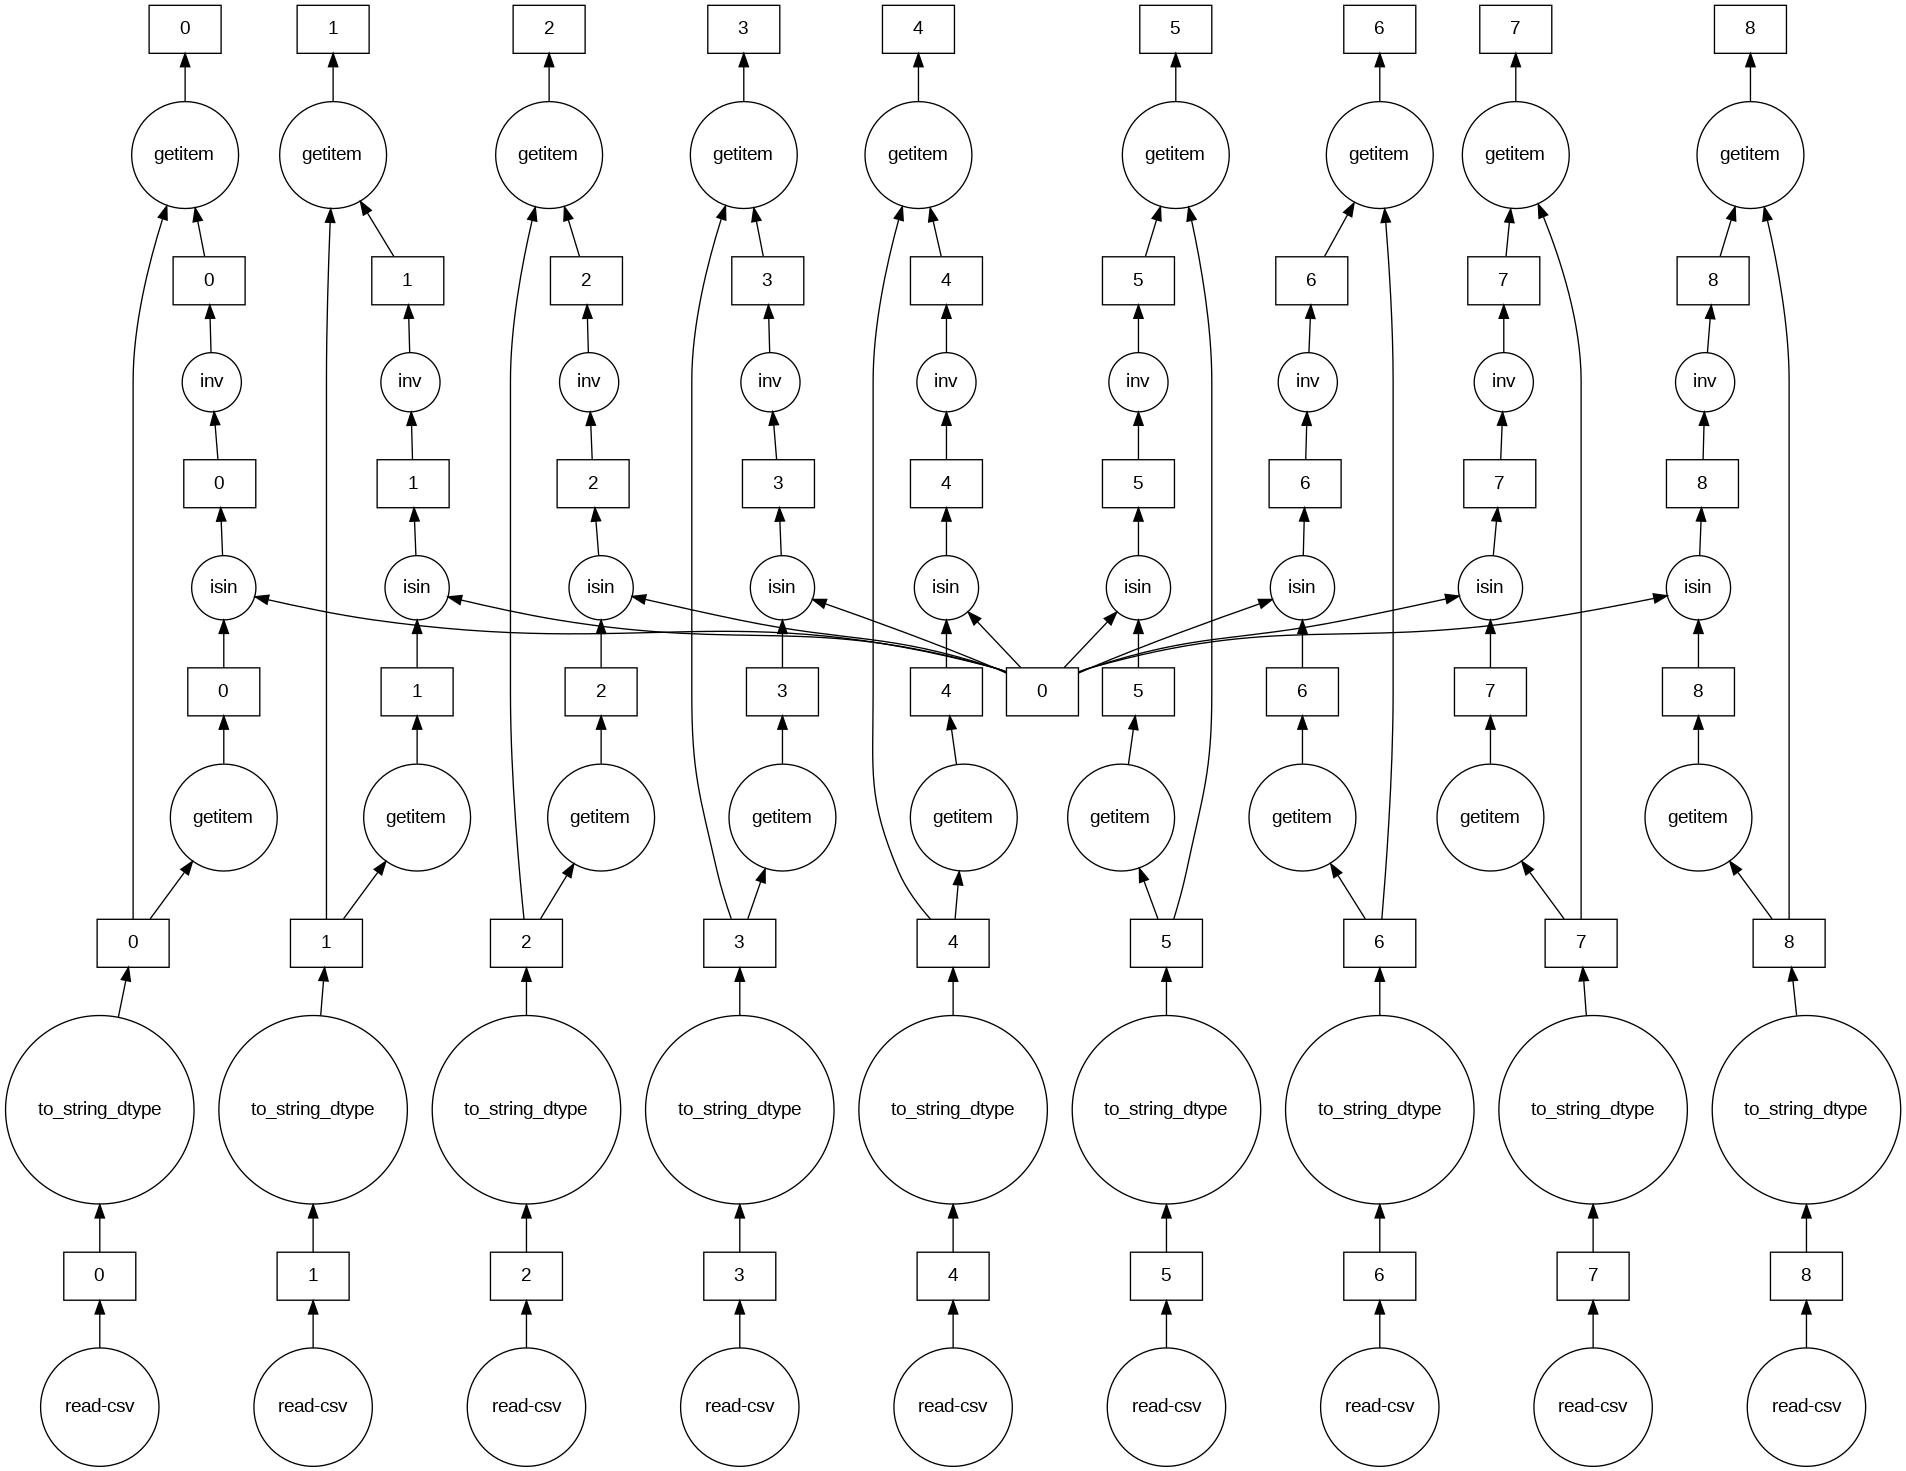

In [ ]:
df.visualize(tasks=True)

In [ ]:
#number of unique tracks in the data

unique_tracks = df.loc[:,'track_id'].nunique()

unique_tracks.compute()

np.int64(30457)

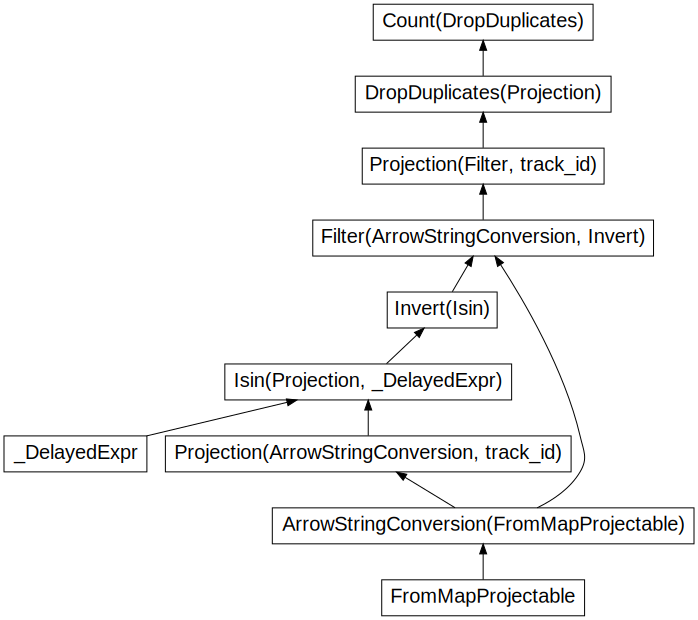

In [ ]:
unique_tracks.visualize()

In [ ]:
# number of unique users in the data

unique_users = df.loc[:,"user_id"].nunique()

unique_users = unique_users.compute()

unique_users

np.int64(962037)

In [ ]:
df

,track_id,user_id,playcount
npartitions=9,,,
,string,string,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [ ]:
#list of unique track ids

unique_track_ids = df['track_id'].unique().compute().tolist()

unique_track_ids

['TRLXSNR128F429361D',
 'TRPUGUW128F426BF6F',
 'TRISTWT128F1488FBB',
 'TRKPWGR128E078EE06',
 'TRXQJWK128F146DF76',
 'TRGASNY128F14696B0',
 'TRSQWMI128F932FC8A',
 'TRBVNWT128F93173BA',
 'TRBHQZM128F42A52D2',
 'TRSWJHK128F429EA6F',
 'TRRUZLF128F42396D0',
 'TRMPCGW128F92E0670',
 'TRJNMNC128F427ED16',
 'TRWCIAX128F42925BD',
 'TRGVKBK128F429EA2D',
 'TRGRPEU128F932BD78',
 'TRANEZZ128F92FFC06',
 'TRRYLYK128F92F89F6',
 'TRQGHWL128EF33FB48',
 'TRWZFIC128F933BCA3',
 'TRKSEEY12903CCD312',
 'TRBTCYJ128F92F9586',
 'TRQPRPK12903CCF3B6',
 'TRJSQQT128F149F9B4',
 'TREWPIM128F4261B51',
 'TRMZPXZ128F92F3495',
 'TRTGEVW128F14979BB',
 'TROUMHD128F9355B89',
 'TRKRNZF12903CB52BC',
 'TRBSBCX128F92DEF11',
 'TRXHDTA128F42A077A',
 'TRSJBLT128F429EA02',
 'TRTJYDU128F92E49EE',
 'TRDTMGK12903CC557F',
 'TRBOAJY128F14979B5',
 'TRBYDXV128F424888B',
 'TRCIOVJ128F429EB51',
 'TRYBFNR128F426BE3D',
 'TRWOYHS128F931EB5A',
 'TRNNLYM128F92EDE7F',
 'TRATHTH128F42BC347',
 'TRXERRS128F42969E4',
 'TRZPVLJ128F148D2F7',
 'TRGTVVB12

In [ ]:
len(unique_track_ids)

30457

In [ ]:
#filtered_songs
filtered_songs = songs_df[songs_df['track_id'].isin(unique_track_ids)]

filtered_songs.reset_index(drop=True, inplace=True)

filtered_songs

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...,01puceOqImrzSfKDAcd1Ia,"rock, alternative, indie, alternative_rock, in...",NaN,1996,264066,0.360,...,7,-9.129,1,0.0260,0.062600,0.000092,0.1720,0.317,74.807,4
4,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...,0BCPKOYdS2jbQ8iyB56Zns,"rock, alternative, indie, pop, alternative_roc...",NaN,2002,307879,0.577,...,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30452,TRXWSIN128F9339A11,Infinite Love Song,Maximilian Hecker,https://p.scdn.co/mp3-preview/8b3d529025fe3c60...,2eIVm8hPf59hUS2PrdoGBa,"electronic, indie_pop, love",NaN,2002,285800,0.549,...,10,-7.431,1,0.0332,0.129000,0.437000,0.1220,0.551,99.679,4
30453,TRPIGDW12903CDEB2D,Slip of the Lip,Fact,https://p.scdn.co/mp3-preview/cf64490291f9a600...,0PG7cpyNzRehf1YNIbAsol,"alternative_rock, punk_rock",Rock,2010,183640,0.423,...,2,-4.068,1,0.1840,0.000986,0.000002,0.3790,0.224,100.080,4
30454,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...,0tt1RdeJX1RyuU4hMEZ19T,NaN,NaN,2008,273440,0.438,...,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
30455,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...,3wkdfXGf5JYErW4b35zP2h,"rock, alternative_rock, japanese, cover",NaN,2004,275133,0.351,...,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4


In [ ]:
filtered_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30457 entries, 0 to 30456
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             30457 non-null  object 
 1   name                 30457 non-null  object 
 2   artist               30457 non-null  object 
 3   spotify_preview_url  30457 non-null  object 
 4   spotify_id           30457 non-null  object 
 5   tags                 29756 non-null  object 
 6   genre                16453 non-null  object 
 7   year                 30457 non-null  int64  
 8   duration_ms          30457 non-null  int64  
 9   danceability         30457 non-null  float64
 10  energy               30457 non-null  float64
 11  key                  30457 non-null  int64  
 12  loudness             30457 non-null  float64
 13  mode                 30457 non-null  int64  
 14  speechiness          30457 non-null  float64
 15  acousticness         30457 non-null 

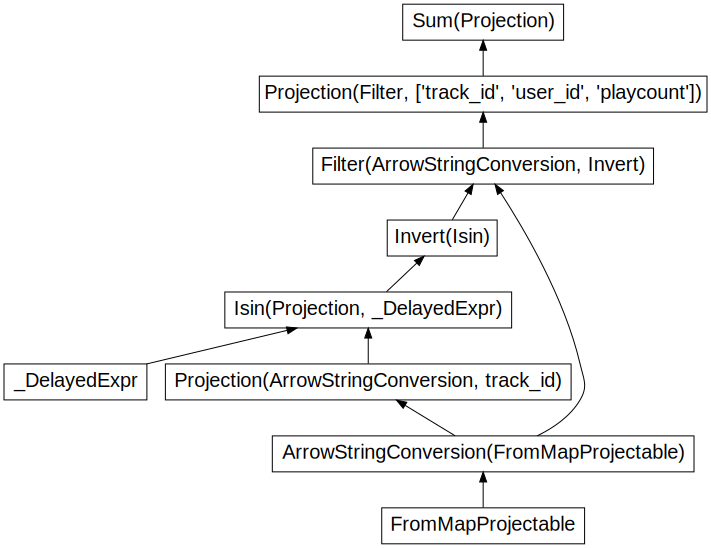

In [ ]:
# Group by track_id and user_id and compute sum of playcount

aggregated_df = df.groupby(['track_id','user_id'])['playcount'].sum()

aggregated_df.visualize()

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

df['playcount'] = df['playcount'].astype(np.float64)
df = df.categorize(columns=['user_id','track_id'])

In [ ]:
#Convert user_id and track_id into numeric indices
user_mapping = df['user_id'].cat.codes
track_mapping = df['track_id'].cat.codes

In [ ]:
df = df.assign(
  user_idx = user_mapping,
  track_idx = track_mapping
)

In [ ]:
df.head()

,track_id,user_id,playcount,user_idx,track_idx
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,10703
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,7332
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,14210
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,23204
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,8934


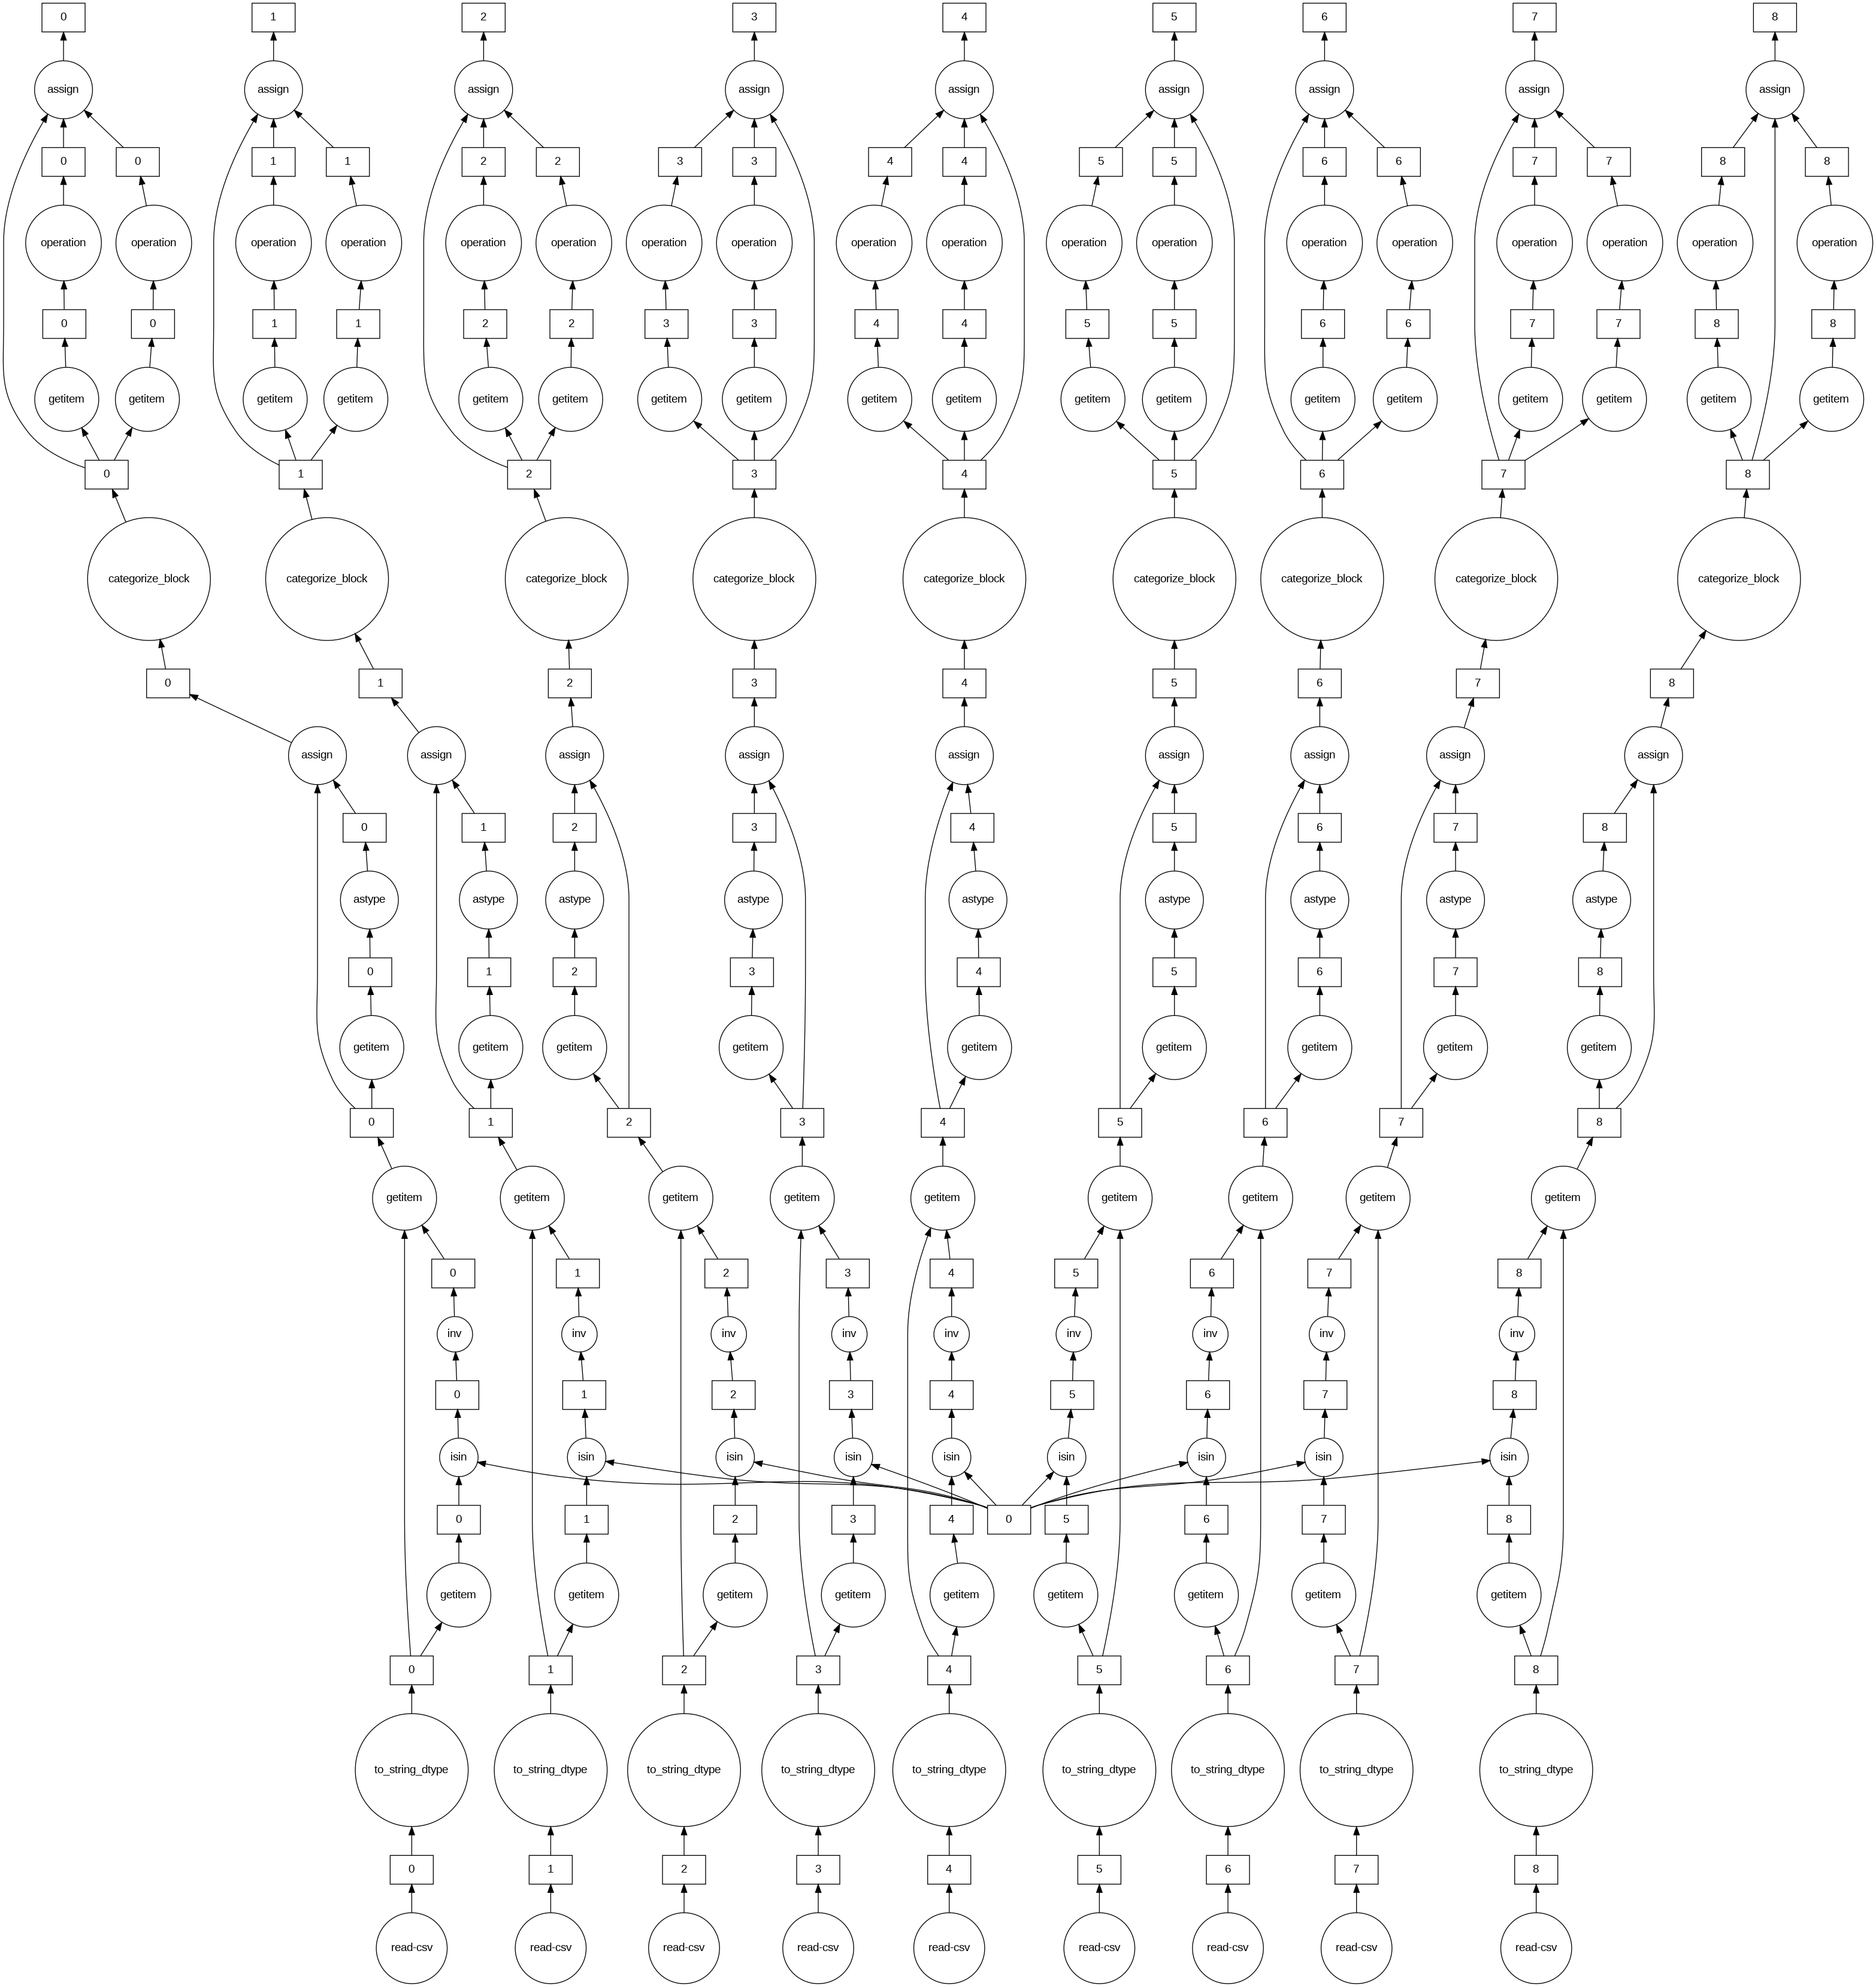

In [ ]:
df.visualize(tasks=True)

In [ ]:
np.where(df['track_id'].cat.categories == 'TRHDDQG12903CB53EE')

(array([8936]),)

In [ ]:
interaction_array = df.groupby(['track_idx', 'user_idx'])['playcount'].sum().reset_index()


In [ ]:
interaction_array = interaction_array.compute()

In [ ]:
interaction_array

,track_idx,user_idx,playcount
0,0,15780,3.0
1,0,76968,1.0
2,0,134525,2.0
3,0,231541,1.0
4,0,305348,1.0
...,...,...,...
9711284,30456,902360,1.0
9711285,30456,913310,1.0
9711286,30456,922319,1.0
9711287,30456,925779,1.0


In [ ]:
row_indices = interaction_array['track_idx']
col_indices = interaction_array['user_idx']
values = interaction_array['playcount']

In [ ]:
n_tracks = unique_tracks.compute()
n_users = unique_users

sparse_matrix = csr_matrix((values, (row_indices, col_indices)), shape=(n_tracks, n_users))

print("Sparse matrix shape: ",sparse_matrix.shape)
print("Non-zero elements: ",sparse_matrix.nnz)

Sparse matrix shape:  (30457, 962037)
Non-zero elements:  9711289


In [ ]:
(sparse_matrix.nnz / (sparse_matrix.shape[0] * sparse_matrix.shape[1]))*100

0.03314347033566998

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
np.where(df['track_id'].cat.categories == "TROINZB128F932F740")

(array([17016]),)

In [ ]:
ind = 17018

In [ ]:
input_array = sparse_matrix[ind]

input_array

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1215 stored elements and shape (1, 962037)>

In [ ]:
similarity_scores = cosine_similarity(input_array, sparse_matrix)

In [ ]:
np.sort(similarity_scores)[-5:]

array([[0.        , 0.        , 0.        , ..., 0.21211085, 0.21216352,
        1.        ]])

In [ ]:
sparse_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9711289 stored elements and shape (30457, 962037)>

In [ ]:
sparse_matrix[np.argsort(similarity_scores.ravel())[-11:][::-1]].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def collaborative_recommendation(song_name,user_data,songs_data,interaction_matrix,k=5):
    # fetch the row from songs data
    song_row = songs_data[songs_data["name"] == song_name]
    print(song_row)
    # track_id of input song
    input_track_id = song_row['track_id'].values.item()
    print(input_track_id)
    # index value of track_id
    ind = np.where(user_data['track_id'].cat.categories == input_track_id)[0].item()
    print(ind)
    # fetch the input vector
    input_array = interaction_matrix[ind]
    # get similarity scores
    similarity_scores = cosine_similarity(input_array, interaction_matrix)
    # get top k recommendations
    recommendation_track_ids = df['track_id'].cat.categories[np.argsort(similarity_scores.ravel())[-k-1:][::-1]]
    print(recommendation_track_ids)
    # get top scores
    top_scores = np.sort(similarity_scores.ravel())[-k-1:][::-1]
    print(top_scores)
    # get the songs from data and print
    temp_df = pd.DataFrame({"track_id":recommendation_track_ids.tolist(),
                            "score":top_scores})
    print(temp_df)
    top_k_songs = (
                    songs_data
                    .loc[songs_data["track_id"].isin(recommendation_track_ids)]
                    .merge(temp_df,on="track_id")
                    .sort_values(by="score",ascending=False)
                    .drop(columns=["track_id","score"])
                    .reset_index(drop=True)
                    )
    return top_k_songs

In [ ]:
collaborative_recommendation(song_name="Crazy in Love",
                             user_data=df,
                             songs_data=filtered_songs,
                             interaction_matrix=sparse_matrix)

                track_id           name   artist  \
3337  TROINZB128F932F740  Crazy in Love  Beyoncé   

                                    spotify_preview_url  \
3337  https://p.scdn.co/mp3-preview/807828ea7070bda7...   

                  spotify_id  \
3337  0klMKiGV38IRaBo3jjt3oC   

                                                  tags genre  year  \
3337  pop, female_vocalists, dance, soul, hip_hop, rnb   NaN  2003   

      duration_ms  danceability  ...  key  loudness  mode  speechiness  \
3337       249000          0.64  ...    7    -5.829     1        0.218   

      acousticness  instrumentalness  liveness  valence   tempo  \
3337       0.00068          0.000003     0.049    0.642  99.211   

      time_signature  
3337               4  

[1 rows x 21 columns]
TROINZB128F932F740
17016
Index(['TROINZB128F932F740', 'TRURCEI12903CA4395', 'TRYLWIW12903CA438D',
       'TRCVMAF12903D00E61', 'TRHRNEE12903CFDBD4', 'TRGEUXY128F4226B26'],
      dtype='string', name='track_id')
[1.   

,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...,0klMKiGV38IRaBo3jjt3oC,"pop, female_vocalists, dance, soul, hip_hop, rnb",NaN,2003,249000,0.640,0.767,7,-5.829,1,0.2180,0.000680,0.000003,0.049,0.6420,99.211,4
1,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...,1loN5RHuhvxF2Xb4okSvHF,drum_and_bass,Electronic,2005,380081,0.410,0.978,7,-5.244,1,0.0495,0.000006,0.690000,0.382,0.0397,116.004,4
2,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...,6eim7EO1nw2pDbrREbzALA,drum_and_bass,Electronic,2005,387996,0.604,0.940,4,-7.941,0,0.0918,0.001440,0.832000,0.167,0.4080,173.950,4
3,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...,11vlxrrjPFhb1NmNgydWAX,black_metal,NaN,2006,338733,0.533,0.953,11,-6.973,1,0.0360,0.000044,0.447000,0.194,0.1600,125.992,4
4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...,3yCWhHYCwR1vhvBseY1c8u,progressive_rock,Rock,1993,551800,0.189,0.858,7,-4.488,1,0.0573,0.022100,0.222000,0.153,0.2970,92.419,4
5,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...,5AagWbHdT5RQz8i9JVpVS9,"electronic, house, techno, french, idm",Electronic,1999,213266,0.721,0.433,6,-10.269,1,0.0864,0.002320,0.886000,0.154,0.3500,158.019,4


In [ ]:
track_ids

NameError: name 'track_ids' is not defined

In [ ]:
df

,track_id,user_id,playcount,user_idx,track_idx
npartitions=9,,,,,
,category[known],category[known],float64,int32,int16
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [ ]:
filtered_songs.to_csv("collab_filtered_data.csv",index=False)

In [ ]:
filtered_songs

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...,01puceOqImrzSfKDAcd1Ia,"rock, alternative, indie, alternative_rock, in...",NaN,1996,264066,0.360,...,7,-9.129,1,0.0260,0.062600,0.000092,0.1720,0.317,74.807,4
4,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...,0BCPKOYdS2jbQ8iyB56Zns,"rock, alternative, indie, pop, alternative_roc...",NaN,2002,307879,0.577,...,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30452,TRXWSIN128F9339A11,Infinite Love Song,Maximilian Hecker,https://p.scdn.co/mp3-preview/8b3d529025fe3c60...,2eIVm8hPf59hUS2PrdoGBa,"electronic, indie_pop, love",NaN,2002,285800,0.549,...,10,-7.431,1,0.0332,0.129000,0.437000,0.1220,0.551,99.679,4
30453,TRPIGDW12903CDEB2D,Slip of the Lip,Fact,https://p.scdn.co/mp3-preview/cf64490291f9a600...,0PG7cpyNzRehf1YNIbAsol,"alternative_rock, punk_rock",Rock,2010,183640,0.423,...,2,-4.068,1,0.1840,0.000986,0.000002,0.3790,0.224,100.080,4
30454,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...,0tt1RdeJX1RyuU4hMEZ19T,NaN,NaN,2008,273440,0.438,...,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,4
30455,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...,3wkdfXGf5JYErW4b35zP2h,"rock, alternative_rock, japanese, cover",NaN,2004,275133,0.351,...,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,4


In [ ]:
track_ids = df['track_id'].cat.categories.values

In [ ]:
np.save("track_ids.npy",track_ids, allow_pickle=True)

In [ ]:
interaction_matrix

NameError: name 'interaction_matrix' is not defined

In [ ]:
np.sparse_matrix

In [ ]:
from scipy.sparse import csr_matrix, save_npz


In [ ]:
save_npz("interaction_matrix.npz",sparse_matrix)